In [2]:
import pyodbc
import pandas as pd

server = 'DESKTOP-4RQNTUS'
user = 'SA'
password = '0203'

conexion = pyodbc.connect(driver='{SQL server}', host = server)

conexion = pyodbc.connect('DRIVER={ODBC Driver 11 for SQL Server};SERVER=' +server+'; UID='+user+';PWD='+ password, autocommit=True)
print("conexion exitosa")



conexion exitosa


In [ ]:
hired_employees = pd.read_sql("SELECT * FROM hired_employees", conexion)

In [3]:
server = 'DESKTOP-4RQNTUS'

bd = 'challengers1'

conexion = pyodbc.connect(driver='{SQL server}', host = server, database = bd)
print('Conexion exitosa')

cursor = conexion.cursor()

Conexion exitosa


In [12]:
#Each new transaction must fit the data dictionary rules.
hired_employees = pd.read_sql("exec sp_columns departments", conexion)
departments = pd.read_sql("exec sp_columns hired_employees", conexion)
jobs = pd.read_sql("exec sp_columns jobs", conexion)


In [14]:
hired_employees

,TABLE_QUALIFIER,TABLE_OWNER,TABLE_NAME,COLUMN_NAME,DATA_TYPE,TYPE_NAME,PRECISION,LENGTH,SCALE,RADIX,NULLABLE,REMARKS,COLUMN_DEF,SQL_DATA_TYPE,SQL_DATETIME_SUB,CHAR_OCTET_LENGTH,ORDINAL_POSITION,IS_NULLABLE,SS_DATA_TYPE
0,challengers1,dbo,departments,id,4,departments,10,4,0.0,10.0,0,None,None,4,None,NaN,1,NO,56
1,challengers1,dbo,departments,department,12,varchar,50,50,NaN,NaN,1,None,None,12,None,50.0,2,YES,39


In [16]:
jobs

,TABLE_QUALIFIER,TABLE_OWNER,TABLE_NAME,COLUMN_NAME,DATA_TYPE,TYPE_NAME,PRECISION,LENGTH,SCALE,RADIX,NULLABLE,REMARKS,COLUMN_DEF,SQL_DATA_TYPE,SQL_DATETIME_SUB,CHAR_OCTET_LENGTH,ORDINAL_POSITION,IS_NULLABLE,SS_DATA_TYPE
0,challengers1,dbo,jobs,id,4,job,10,4,0.0,10.0,0,None,None,4,None,NaN,1,NO,56
1,challengers1,dbo,jobs,job,12,varchar,50,50,NaN,NaN,1,None,None,12,None,50.0,2,YES,39


In [17]:
departments

,TABLE_QUALIFIER,TABLE_OWNER,TABLE_NAME,COLUMN_NAME,DATA_TYPE,TYPE_NAME,PRECISION,LENGTH,SCALE,RADIX,NULLABLE,REMARKS,COLUMN_DEF,SQL_DATA_TYPE,SQL_DATETIME_SUB,CHAR_OCTET_LENGTH,ORDINAL_POSITION,IS_NULLABLE,SS_DATA_TYPE
0,challengers1,dbo,hired_employees,id,4,int identity,10,4,0.0,10.0,0,None,None,4,None,NaN,1,NO,56
1,challengers1,dbo,hired_employees,name,12,varchar,50,50,NaN,NaN,1,None,None,12,None,50.0,2,YES,39
2,challengers1,dbo,hired_employees,datetime,12,varchar,50,50,NaN,NaN,1,None,None,12,None,50.0,3,YES,39
3,challengers1,dbo,hired_employees,department_id,4,int,10,4,0.0,10.0,1,None,None,4,None,NaN,4,YES,38
4,challengers1,dbo,hired_employees,job_id,4,int,10,4,0.0,10.0,1,None,None,4,None,NaN,5,YES,38


In [18]:
#Receive the data for each table in the same service.
#Keep in mind the data rules for each table.
hired_employees = pd.read_sql("SELECT * FROM hired_employees", conexion)
departments = pd.read_sql("SELECT * FROM departments", conexion)
jobs = pd.read_sql("SELECT * FROM jobs", conexion)



In [19]:
hired_employees

,id,name,datetime,department_id,job_id
0,1,Harold Vogt,2021-11-07T02:48:42Z,2.0,96.0
1,2,Ty Hofer,2021-05-30T05:43:46Z,8.0,NaN
2,3,Lyman Hadye,2021-09-01T23:27:38Z,5.0,52.0
3,4,Lotti Crowthe,2021-10-01T13:04:21Z,12.0,71.0
4,5,Gretna Lording,2021-10-10T22:22:17Z,6.0,80.0
...,...,...,...,...,...
1997,1998,Jerry Yven,2021-10-03T14:12:50Z,7.0,100.0
1998,1999,Jerri Zebedee,2022-01-18T10:47:37Z,8.0,80.0
1999,2000,Harold Vogt,2021-11-07T02 48 42Z,2.0,96.0
2000,2002,Harold Vogt,2021-11-07T02 48 42Z,2.0,96.0


In [20]:
departments

,id,department
0,1,Product Management
1,2,Sales
2,3,Research and Development
3,4,Business Development
4,5,Engineering
5,6,Human Resources
6,7,Services
7,8,Support
8,9,Marketing
9,10,Training


In [21]:
jobs

,id,job
0,1,Marketing Assistant
1,2,VP Sales
2,3,Biostatistician IV
3,4,Account Representative II
4,5,VP Marketing
...,...,...
178,179,Software Engineer II
179,180,Statistician IV
180,181,Programmer Analyst I
181,182,Account Representative I


In [8]:
hired_employees.describe()

,id,department_id,job_id
count,2002.000000,1981.000000,1986.000000
mean,1010.491009,6.243311,75.462236
std,716.929102,2.680148,35.431330
min,1.000000,1.000000,1.000000
25%,501.250000,4.000000,50.250000
50%,1001.500000,6.000000,69.000000
75%,1501.750000,8.000000,97.000000
max,20001.000000,12.000000,182.000000


In [22]:
#3. Create a feature to backup for each table and save it in the file system in AVRO format.
hired_employees = pd.read_sql("SELECT * FROM hired_employees FOR JSON AUTO", conexion)
departments = pd.read_sql("SELECT * FROM departments FOR JSON AUTO", conexion)
jobs = pd.read_sql("SELECT * FROM jobs FOR JSON AUTO", conexion)


In [23]:
hired_employees

,JSON_F52E2B61-18A1-11d1-B105-00805F49916B
0,"[{""id"":1,""name"":""Harold Vogt"",""datetime"":""2021..."
1,"""Toddy Gare"",""datetime"":""2021-12-05T18:00:50Z""..."
2,"6},{""id"":43,""name"":""Agneta Rae"",""datetime"":""20..."
3,"15T06:17:11Z"",""department_id"":7,""job_id"":104},..."
4,"etime"":""2021-02-26T18:47:53Z"",""department_id"":..."
...,...
93,"5},{""id"":1911,""name"":""Darill Tant"",""datetime"":..."
94,"T06:05:42Z"",""department_id"":4,""job_id"":138},{""..."
95,"-01T13:12:27Z"",""department_id"":7,""job_id"":110}..."
96,"id"":8,""job_id"":26},{""id"":1972,""name"":""Bridgett..."


In [24]:
departments

,JSON_F52E2B61-18A1-11d1-B105-00805F49916B
0,"[{""id"":1,""department"":""Product Management""},{""..."


In [25]:
jobs

,JSON_F52E2B61-18A1-11d1-B105-00805F49916B
0,"[{""id"":1,""job"":""Marketing Assistant""},{""id"":2,..."
1,"Administrator IV""},{""id"":55,""job"":""Software T..."
2,"""},{""id"":110,""job"":""Senior Sales Associate""},{..."
3,"id"":162,""job"":""Compensation Analyst""},{""id"":16..."


##### Number of employees hired for each job and department in 2021 divided by quarter. The table must be ordered alphabetically by department and job.

In [30]:
challenger1 = pd.read_sql("SELECT d.department, j.job, e.department_id as 'Q1', COUNT(*) as 'Q2',e.job_id as 'Q3', DATEPART(quarter,e.datetime) AS 'Q4' FROM hired_employees e, departments d, jobs j WHERE e.id = d.id and e.id = j.id and datetime > '2021'\
GROUP BY d.department, j.job, e.department_id, e.job_id, DATEPART(quarter,e.datetime)\
HAVING COUNT(*) > 1/3\
ORDER BY d.department, j.job, e.department_id, e.job_id, DATEPART(quarter,e.datetime), COUNT(*) ASC", conexion)

In [31]:
challenger1

,department,job,Q1,Q2,Q3,Q4
0,Accounting,Computer Systems Analyst I,7,1,29.0,2
1,Business Development,Account Representative II,12,1,71.0,4
2,Engineering,VP Marketing,6,1,80.0,4
3,Human Resources,Environmental Specialist,6,1,95.0,2
4,Legal,Financial Advisor,6,1,41.0,3
5,Marketing,Information Systems Manager,9,1,8.0,2
6,Product Management,Marketing Assistant,2,1,96.0,4
7,Research and Development,Biostatistician IV,5,1,52.0,3
8,Sales,VP Sales,8,1,NaN,2
9,Services,Software Consultant,9,1,78.0,4


##### List of ids, name and number of employees hired of each department that hired more employees than the mean of employees hired in 2021 for all the departments, ordered by the number of employees hired (descending).

In [32]:
challenger2 = pd.read_sql("SELECT d.department, COUNT(e.id) as 'hired' FROM departments d JOIN hired_employees e ON e.department_id=d.id WHERE  datetime > '2021' GROUP BY d.department ORDER BY d.department DESC", conexion)

In [33]:
challenger2

,department,hired
0,Training,141
1,Support,254
2,Services,238
3,Sales,113
4,Research and Development,177
5,Product Management,55
6,Marketing,165
7,Legal,68
8,Human Resources,246
9,Engineering,244


<AxesSubplot:xlabel='department', ylabel='count'>

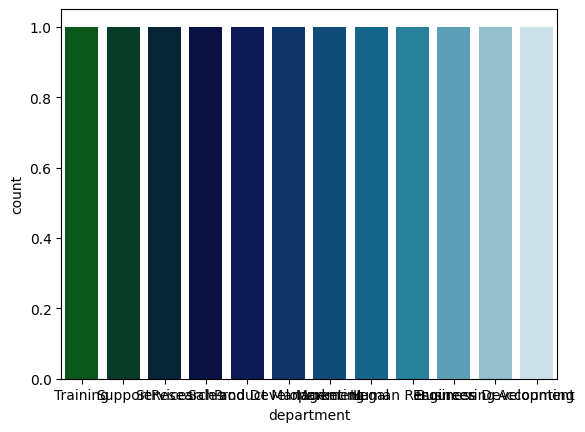

In [41]:
#visual report
import seaborn as sns

sns.countplot(x = 'department', data = challenger2 , palette = 'ocean')

In [ ]:
cursor.close()